In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib notebook

In [3]:
from google.colab import files
uploaded = files.upload()

Saving quiz1_dataset.csv to quiz1_dataset.csv


In [4]:
data = np.genfromtxt('quiz1_dataset.csv', delimiter=',')

In [5]:
data.shape

(488, 4)

In [6]:
X = data[:, :-1]
y = data[:, -1:]
X.shape, y.shape

((488, 3), (488, 1))

In [19]:
class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable
    
    def grad_update(self,w_old,lr,y,x):
        w = w_old - ((2*lr*(np.dot(x.T, (np.dot(x, w_old)-y)))/x.shape[0]))
        return w

    def error(self,w,y,x):
        return np.sum((y- np.dot(x, w))**2)/x.shape[0]

    def mat_inv(self,y,x_aug):
        return np.linalg.inv((x_aug.T).dot(x_aug)).dot(x_aug.T).dot(y)

    def Regression_grad_des(self,x,y,lr):
        w_pred = np.zeros((x.shape[1], 1))
        err = []
        for i in range(1000):
            w_pred = self.grad_update(w_pred, lr, y, x)
            err.append(self.error(w_pred, y, x))
        return w_pred,err
    
    def plot_single_feature(self, x, y):
        plt.figure()
        plt.scatter(x, y, s=10)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()
        
    def plot_two_feature(self, x, y):
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.scatter(x[:, 0], x[:, 1], y)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()
        
    def feature_scale(self, x):
        x_mean = x.mean(axis=0)
        x_stdev = x.std(axis=0)
        x_norm = (x - x_mean)/(x_stdev)
        return x_norm, x_mean, x_stdev
        
    def featurewise_regression(self, x, y, x_test, y_test, fold_featurewise_dict, fold_number, learning_rate= 0.01):
        for i in range(x.shape[1]):
            x_norm, x_mean, x_stdev = self.feature_scale(x[:, i])
            X_aug = np.c_[np.ones((x.shape[0], 1)), x_norm]
            fold_featurewise_dict['w_pred_mat_inv'][i+1][fold_number] = self.mat_inv(y, X_aug)
            fold_featurewise_dict['w_pred_grad_desc'][i+1][fold_number], error = self.Regression_grad_des(X_aug, y, learning_rate).round()
            fold_featurewise_dict['Training_error'][i+1][fold_number] = error[-1]
            
            x_test_norm = (x_test[:, i] - x_mean)/(x_stdev)
            x_test_aug = np.c_[np.ones((x_test.shape[0], 1)), x_test_norm]
            
            fold_featurewise_dict['Testing_error'][i+1][fold_number] = self.error(fold_featurewise_dict['w_pred_grad_desc'][i+1][fold_number], y_test, x_test_aug)
    
    def data_transform(self, X,degree):
        X_new = np.ones((X.shape[0], 1))
        for i in range(1, degree+1):
            X_new = np.c_[X_new, X**i]
        return X_new.T
    
    def feature_poly_regression(self, x, y, x_test, y_test, fold_featurewise_dict, fold_number, feature, learning_rate= 0.01):
        x_norm, x_mean, x_stdev = self.feature_scale(x)
        X_aug = np.c_[np.ones((x.shape[0], 1)), x_norm]
        fold_featurewise_dict['w_pred_mat_inv'][feature][fold_number] = self.mat_inv(y, X_aug).round(4)
        fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number], error = self.Regression_grad_des(X_aug, y, learning_rate)
        fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number] = fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number].round(4)
        fold_featurewise_dict['Training_error'][feature][fold_number] = error[-1]

        x_test_norm = (x_test - x_mean)/(x_stdev)
        x_test_aug = np.c_[np.ones((x_test.shape[0], 1)), x_test_norm]

        fold_featurewise_dict['Testing_error'][feature][fold_number] = self.error(fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number], y_test, x_test_aug)
    
    def bi_feature_poly_regression(self, x, y, x_test, y_test, fold_featurewise_dict, fold_number, feature, learning_rate= 0.01):
        x_norm, x_mean, x_stdev = self.feature_scale(x)
        X_aug = np.c_[np.ones((x.shape[0], 1)), x_norm]
        fold_featurewise_dict['w_pred_mat_inv'][feature][fold_number] = self.mat_inv(y, X_aug).round(4)
        fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number], error = self.Regression_grad_des(X_aug, y, learning_rate)
        fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number] = fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number].round(4)
        fold_featurewise_dict['Training_error'][feature][fold_number] = error[-1]

        x_test_norm = (x_test - x_mean)/(x_stdev)
        x_test_aug = np.c_[np.ones((x_test.shape[0], 1)), x_test_norm]

        fold_featurewise_dict['Testing_error'][feature][fold_number] = self.error(fold_featurewise_dict['w_pred_grad_desc'][feature][fold_number], y_test, x_test_aug)
    

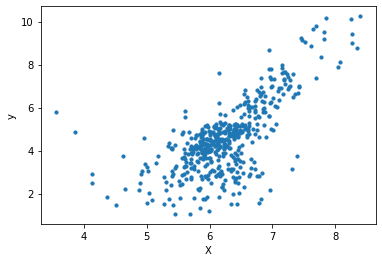

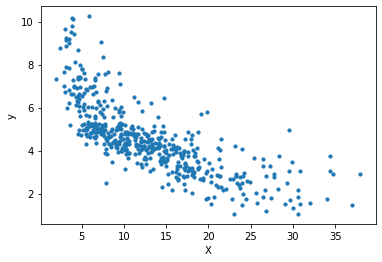

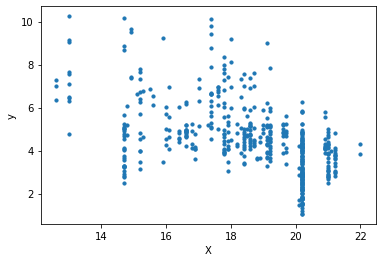

In [20]:
reg = regression()
for i in range(X.shape[1]):
    reg.plot_single_feature(data[:, i], y)

In [21]:
test_size = y.shape[0]//5

In [22]:
fold_featurewise_dict = {}
fold_featurewise_dict['w_pred_mat_inv'] = {}
fold_featurewise_dict['w_pred_grad_desc'] = {}
fold_featurewise_dict['Training_error'] = {}
fold_featurewise_dict['Testing_error'] = {}

for key in fold_featurewise_dict.keys():
    for i in range(X.shape[1]):
        fold_featurewise_dict[key][i+1] = {}
        for j in range(5):
            fold_featurewise_dict[key][i+1][j+1] = {}
            
for i in fold_featurewise_dict: 
    print(i)

w_pred_mat_inv
w_pred_grad_desc
Training_error
Testing_error


In [23]:
test_slice, remainder = np.split(X.copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)
reg.featurewise_regression(remainder, remainder_y, test_slice, test_slice_y, fold_featurewise_dict, 1, 0.01)


for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.featurewise_regression(remainder, remainder_y, test_slice, test_slice_y, fold_featurewise_dict, i+2, 0.01)

reg.featurewise_regression(X[:4*test_size], y[:4*test_size], X[4*test_size:], y[4*test_size:], fold_featurewise_dict, 5, 0.01)    

AttributeError: ignored

In [16]:
import pandas as pd

w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.525365728900258], [1.203635626002213]]",{},{}
2,{},{},{}
3,{},{},{}
4,{},{},{}
5,{},{},{}


In [ ]:
w_pred_mat_inv[1].mean()

TypeError: ignored

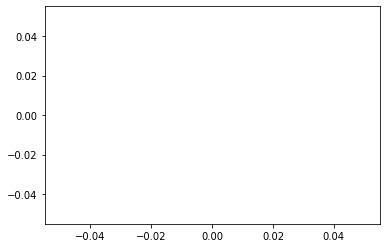

In [18]:
X_norm, X_mean, X_stdev = reg.feature_scale(X)
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm[:, 0]]
plt.figure()
plt.scatter(X_norm[:, 0], y, s=10)
plt.plot(X_norm[:, 0], np.dot(X_aug, (w_pred_mat_inv[1].mean())), 'y-')
plt.show()

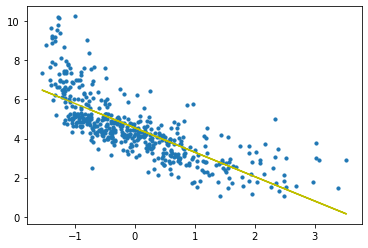

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(X)
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm[:, 1]]
plt.figure()
plt.scatter(X_norm[:, 1], y, s=10)
plt.plot(X_norm[:, 1], np.dot(X_aug, (w_pred_mat_inv[2].mean())), 'y-')
plt.show()

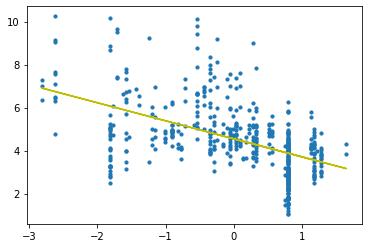

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(X)
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm[:, 2]]
plt.figure()
plt.scatter(X_norm[:, 2], y, s=10)
plt.plot(X_norm[:, 2], np.dot(X_aug, (w_pred_mat_inv[3].mean())), 'y-')
plt.show()

In [ ]:
w_pred_grad_desc = pd.DataFrame(fold_featurewise_dict['w_pred_grad_desc'])
w_pred_grad_desc.head()

,1,2,3
1,"[[4.513384607788739], [1.1856453162042289]]","[[4.513384607788739], [-1.3379244837977482]]","[[4.513384607788739], [-0.950264406075576]]"
2,"[[4.48139999245795], [1.1552245231291773]]","[[4.481399992457951], [-1.283373879733989]]","[[4.481399992457952], [-1.0265632743765432]]"
3,"[[4.168553839138309], [0.796310109210336]]","[[4.168553839138308], [-1.1086375401594677]]","[[4.168553839138309], [-0.6096300917590995]]"
4,"[[4.7197769151336955], [1.2550325640722173]]","[[4.719776915133695], [-1.2621795550191128]]","[[4.719776915133695], [-0.8400518686086316]]"
5,"[[4.8304871052725105], [1.2814175260645468]]","[[4.830487105272509], [-1.2300566010788496]]","[[4.830487105272509], [-0.7736170469172082]]"


In [ ]:
Training_error = pd.DataFrame(fold_featurewise_dict['Training_error'])
Training_error.head()

,1,2,3
1,1.630627,1.246340,2.133379
2,1.525732,1.213227,1.806444
3,1.393646,0.798679,1.656107
4,1.195831,1.177840,2.065250
5,1.098505,1.227497,2.142053


In [ ]:
Testing_error = pd.DataFrame(fold_featurewise_dict['Testing_error'])
Testing_error.head()

,1,2,3
1,0.522134,0.799912,1.489889
2,0.970150,0.929358,3.290649
3,2.075741,2.917910,3.890634
4,2.420765,1.134718,1.801138
5,2.906771,0.883387,1.595027


In [ ]:
reg = regression()

In [ ]:
fold_featurewise_dict = {}
fold_featurewise_dict['w_pred_mat_inv'] = {}
fold_featurewise_dict['w_pred_grad_desc'] = {}
fold_featurewise_dict['Training_error'] = {}
fold_featurewise_dict['Testing_error'] = {}

for key in fold_featurewise_dict.keys():
    for i in range(X.shape[1]):
        fold_featurewise_dict[key][i+1] = {}
        for j in range(5):
            fold_featurewise_dict[key][i+1][j+1] = {}
            
for i in fold_featurewise_dict: 
    print(i)

w_pred_mat_inv
w_pred_grad_desc
Training_error
Testing_error


In [ ]:
X_transform = (reg.data_transform(X[:, 0], 2)).T
X_transform.shape

(487, 3)

In [ ]:
test_slice, remainder = np.split(X_transform.copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)

reg.feature_poly_regression(remainder[:, 1:], remainder_y, test_slice[:, 1:], test_slice_y, fold_featurewise_dict, 1, 1, 0.01)

for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.feature_poly_regression(remainder[:, 1:], remainder_y, test_slice[:, 1:], test_slice_y, fold_featurewise_dict, i+2, 1, 0.01)

reg.feature_poly_regression(X_transform[:4*test_size, 1:], y[:4*test_size], X_transform[4*test_size:, 1:], y[4*test_size:], fold_featurewise_dict, 5, 1, 0.01)    

In [ ]:
w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.5134], [-4.1317], [5.3456]]","[[4.5134], [-3.1018], [1.8321]]",{}
2,"[[4.4814], [-3.9182], [5.1018]]","[[4.4814], [-2.9361], [1.7173]]",{}
3,"[[4.1686], [-3.5232], [4.3396]]","[[4.1686], [-2.4994], [1.4408]]",{}
4,"[[4.7198], [-3.0734], [4.341]]","[[4.7198], [-3.0027], [1.8133]]",{}
5,"[[4.8305], [-3.1973], [4.5024]]","[[4.8305], [-2.9525], [1.7912]]",{}


In [ ]:
w_pred_mat_inv[1].mean()

array([[ 4.54274],
       [-3.56876],
       [ 4.72608]])

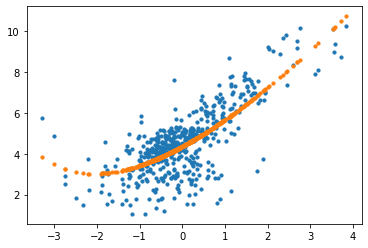

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(X_transform[:, 1:])
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm]
plt.figure()
plt.scatter(X_norm[:, 1], y, s=10)
plt.scatter(X_norm[:, 1], np.dot(X_aug, (w_pred_mat_inv[1].mean())), s=10)
plt.show()

In [ ]:
X_transform = (reg.data_transform(X[:, 1], 2)).T
X_transform.shape

(487, 3)

In [ ]:
test_slice, remainder = np.split(X_transform.copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)

reg.feature_poly_regression(remainder[:, 1:], remainder_y, test_slice[:, 1:], test_slice_y, fold_featurewise_dict, 1, 2, 0.01)

for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.feature_poly_regression(remainder[:, 1:], remainder_y, test_slice[:, 1:], test_slice_y, fold_featurewise_dict, i+2, 2, 0.01)

reg.feature_poly_regression(X_transform[:4*test_size, 1:], y[:4*test_size], X_transform[4*test_size:, 1:], y[4*test_size:], fold_featurewise_dict, 5, 2, 0.01)    

In [ ]:
w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.5134], [-4.1317], [5.3456]]","[[4.5134], [-3.1018], [1.8321]]",{}
2,"[[4.4814], [-3.9182], [5.1018]]","[[4.4814], [-2.9361], [1.7173]]",{}
3,"[[4.1686], [-3.5232], [4.3396]]","[[4.1686], [-2.4994], [1.4408]]",{}
4,"[[4.7198], [-3.0734], [4.341]]","[[4.7198], [-3.0027], [1.8133]]",{}
5,"[[4.8305], [-3.1973], [4.5024]]","[[4.8305], [-2.9525], [1.7912]]",{}


In [ ]:
w_pred_mat_inv[2].mean()

array([[ 4.54274],
       [-2.8985 ],
       [ 1.71894]])

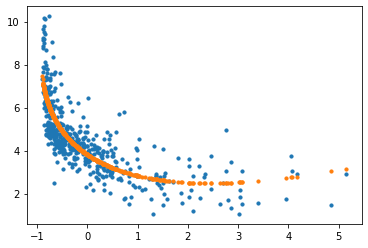

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(X_transform[:, 1:])
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm]
plt.figure()
plt.scatter(X_norm[:, 1], y, s=10)
plt.scatter(X_norm[:, 1], np.dot(X_aug, (w_pred_mat_inv[2].mean())), s=10)
plt.show()

In [ ]:
X_transform = (reg.data_transform(X[:, 2], 2)).T
X_transform.shape

(487, 3)

In [ ]:
test_slice, remainder = np.split(X_transform.copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)

reg.feature_poly_regression(remainder[:, 1:], remainder_y, test_slice[:, 1:], test_slice_y, fold_featurewise_dict, 1, 3, 0.01)

for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.feature_poly_regression(remainder[:, 1:], remainder_y, test_slice[:, 1:], test_slice_y, fold_featurewise_dict, i+2, 3, 0.01)

reg.feature_poly_regression(X_transform[:4*test_size, 1:], y[:4*test_size], X_transform[4*test_size:, 1:], y[4*test_size:], fold_featurewise_dict, 5, 3, 0.01)    

In [ ]:
w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.5134], [-4.1317], [5.3456]]","[[4.5134], [-3.1018], [1.8321]]","[[4.5134], [2.373], [-3.3296]]"
2,"[[4.4814], [-3.9182], [5.1018]]","[[4.4814], [-2.9361], [1.7173]]","[[4.4814], [1.4488], [-2.4809]]"
3,"[[4.1686], [-3.5232], [4.3396]]","[[4.1686], [-2.4994], [1.4408]]","[[4.1686], [4.2673], [-4.8853]]"
4,"[[4.7198], [-3.0734], [4.341]]","[[4.7198], [-3.0027], [1.8133]]","[[4.7198], [2.999], [-3.847]]"
5,"[[4.8305], [-3.1973], [4.5024]]","[[4.8305], [-2.9525], [1.7912]]","[[4.8305], [2.4968], [-3.278]]"


In [ ]:
w_pred_mat_inv[3].mean()

array([[ 4.54274],
       [ 2.71698],
       [-3.56416]])

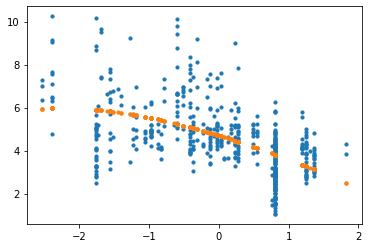

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(X_transform[:, 1:])
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm]
plt.figure()
plt.scatter(X_norm[:, 1], y, s=10)
plt.scatter(X_norm[:, 1], np.dot(X_aug, (w_pred_mat_inv[3].mean())), s=10)
plt.show()

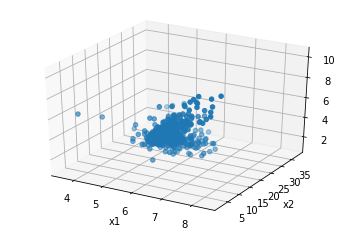

In [ ]:
reg = regression()
reg.plot_two_feature(data[:, 0:2], y)

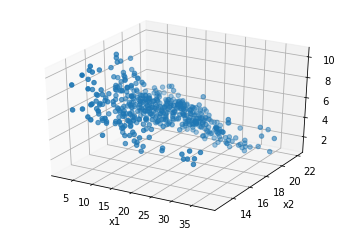

In [ ]:
reg.plot_two_feature(data[:, 1:3], y)

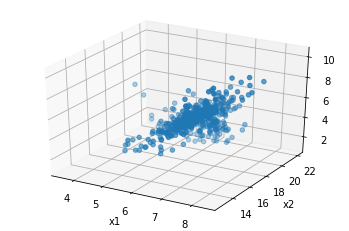

In [ ]:
reg.plot_two_feature(np.c_[data[:, 0], data[:,2]], y)

In [ ]:
fold_featurewise_dict = {}
fold_featurewise_dict['w_pred_mat_inv'] = {}
fold_featurewise_dict['w_pred_grad_desc'] = {}
fold_featurewise_dict['Training_error'] = {}
fold_featurewise_dict['Testing_error'] = {}

for key in fold_featurewise_dict.keys():
    for i in range(X.shape[1]):
        fold_featurewise_dict[key][i+1] = {}
        for j in range(5):
            fold_featurewise_dict[key][i+1][j+1] = {}
            
for i in fold_featurewise_dict: 
    print(i)

w_pred_mat_inv
w_pred_grad_desc
Training_error
Testing_error


In [ ]:
test_slice, remainder = np.split(X[:, 0:2].copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)

reg.bi_feature_poly_regression(remainder[:, 0:2], remainder_y, test_slice[:, 0:2], test_slice_y, fold_featurewise_dict, 1, 1, 0.01)

for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.bi_feature_poly_regression(remainder[:, 0:2], remainder_y, test_slice[:, 0:2], test_slice_y, fold_featurewise_dict, i+2, 1, 0.01)

reg.bi_feature_poly_regression(X[:4*test_size, 0:2], y[:4*test_size], X[4*test_size:, 0:2], y[4*test_size:], fold_featurewise_dict, 5, 1, 0.01)    

In [ ]:
w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.5134], [0.5752], [-0.9794]]",{},{}
2,"[[4.4814], [0.6179], [-0.9241]]",{},{}
3,"[[4.1686], [0.2609], [-0.9637]]",{},{}
4,"[[4.7198], [0.7589], [-0.7786]]",{},{}
5,"[[4.8305], [0.8329], [-0.6834]]",{},{}


In [ ]:
test_slice, remainder = np.split(X[:, 1:3].copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)

reg.bi_feature_poly_regression(remainder[:, 0:2], remainder_y, test_slice[:, 0:2], test_slice_y, fold_featurewise_dict, 1, 2, 0.01)

for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.bi_feature_poly_regression(remainder[:, 0:2], remainder_y, test_slice[:, 0:2], test_slice_y, fold_featurewise_dict, i+2, 2, 0.01)

reg.bi_feature_poly_regression(X[:4*test_size, 0:2], y[:4*test_size], X[4*test_size:, 0:2], y[4*test_size:], fold_featurewise_dict, 5, 2, 0.01)  

In [ ]:
w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.5134], [0.5752], [-0.9794]]","[[4.5134], [-1.1401], [-0.4891]]",{}
2,"[[4.4814], [0.6179], [-0.9241]]","[[4.4814], [-1.0327], [-0.5812]]",{}
3,"[[4.1686], [0.2609], [-0.9637]]","[[4.1686], [-1.0175], [-0.3172]]",{}
4,"[[4.7198], [0.7589], [-0.7786]]","[[4.7198], [-1.1036], [-0.458]]",{}
5,"[[4.8305], [0.8329], [-0.6834]]","[[4.8305], [0.8329], [-0.6834]]",{}


In [ ]:
test_slice, remainder = np.split(np.c_[X[:, 0], X[:, 2]].copy(), [test_size], axis=0)
test_slice_y, remainder_y = np.split(y.copy(), [test_size], axis=0)

reg.bi_feature_poly_regression(remainder[:, 0:2], remainder_y, test_slice[:, 0:2], test_slice_y, fold_featurewise_dict, 1, 3, 0.01)

for i in range(0, 3):
    remainder[i*test_size:(i+1)*test_size], test_slice = test_slice, remainder[i*test_size:(i+1)*test_size].copy()
    remainder_y[i*test_size:(i+1)*test_size], test_slice_y = test_slice_y, remainder_y[i*test_size:(i+1)*test_size].copy()
    reg.bi_feature_poly_regression(remainder[:, 0:2], remainder_y, test_slice[:, 0:2], test_slice_y, fold_featurewise_dict, i+2, 3, 0.01)

reg.bi_feature_poly_regression(X[:4*test_size, 0:2], y[:4*test_size], X[4*test_size:, 0:2], y[4*test_size:], fold_featurewise_dict, 5, 3, 0.01)

In [ ]:
w_pred_mat_inv = pd.DataFrame(fold_featurewise_dict['w_pred_mat_inv'])
w_pred_mat_inv.head()

,1,2,3
1,"[[4.5134], [0.5752], [-0.9794]]","[[4.5134], [-1.1401], [-0.4891]]","[[4.5134], [0.9842], [-0.6409]]"
2,"[[4.4814], [0.6179], [-0.9241]]","[[4.4814], [-1.0327], [-0.5812]]","[[4.4814], [0.8809], [-0.6609]]"
3,"[[4.1686], [0.2609], [-0.9637]]","[[4.1686], [-1.0175], [-0.3172]]","[[4.1686], [0.7188], [-0.4977]]"
4,"[[4.7198], [0.7589], [-0.7786]]","[[4.7198], [-1.1036], [-0.458]]","[[4.7198], [1.1082], [-0.537]]"
5,"[[4.8305], [0.8329], [-0.6834]]","[[4.8305], [0.8329], [-0.6834]]","[[4.8305], [0.8329], [-0.6834]]"


(487, 3)


<IPython.core.display.Javascript object>


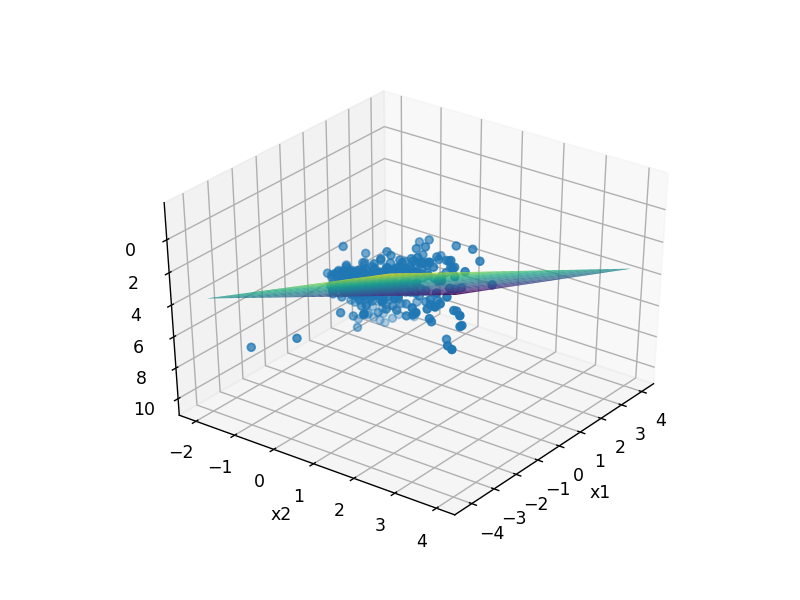

In [ ]:
print(X.shape)
X_norm, X_mean, X_stdev = reg.feature_scale(X[:, 0:2])
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm]

m = 30
x_1 = np.linspace(-4,4,30)
y_1 = np.linspace(-2,4,30)

X_1,Y_1 = np.meshgrid(x_1,y_1)
Z= w_pred_mat_inv[1].mean()[1, 0]*X_1 + w_pred_mat_inv[1].mean()[2,0]*Y_1 + w_pred_mat_inv[1].mean()[0,0]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_norm[:, 0], X_norm[:, 1], y)
surf = ax.plot_surface(X_1, Y_1, Z, cmap='viridis')
# ax.plot_surface(X_norm[:, 0], X_norm[:, 1],  np.dot(X_aug, (w_pred_mat_inv[1].mean())), color='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<IPython.core.display.Javascript object>


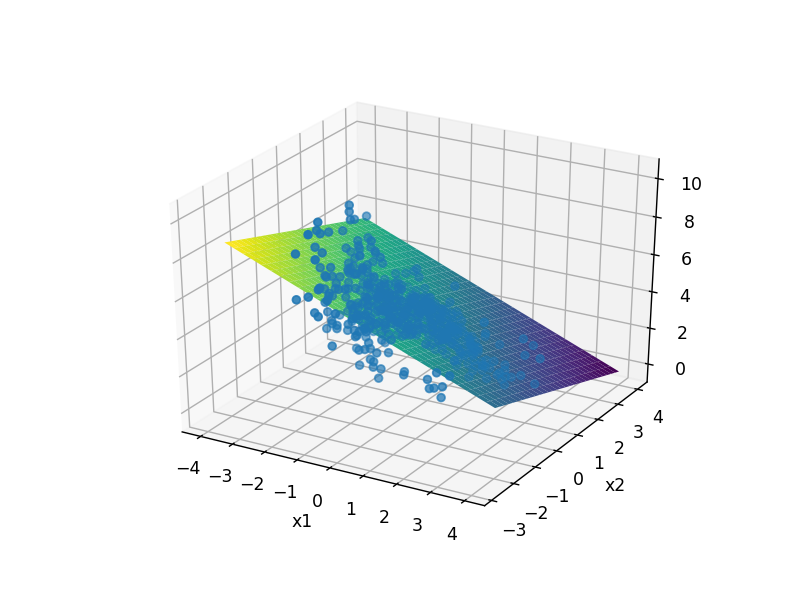

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(X[:, 1:3])
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm]

m = 30
x_1 = np.linspace(-4,4,30)
y_1 = np.linspace(-2,4,30)

X_1,Y_1 = np.meshgrid(x_1,y_1)
Z= w_pred_mat_inv[2].mean()[1, 0]*X_1 + w_pred_mat_inv[2].mean()[2,0]*Y_1 + w_pred_mat_inv[2].mean()[0,0]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_norm[:, 0], X_norm[:, 1], y)
surf = ax.plot_surface(X_1, Y_1, Z, cmap='viridis')
# ax.plot_surface(X_norm[:, 0], X_norm[:, 1],  np.dot(X_aug, (w_pred_mat_inv[1].mean())), color='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<IPython.core.display.Javascript object>


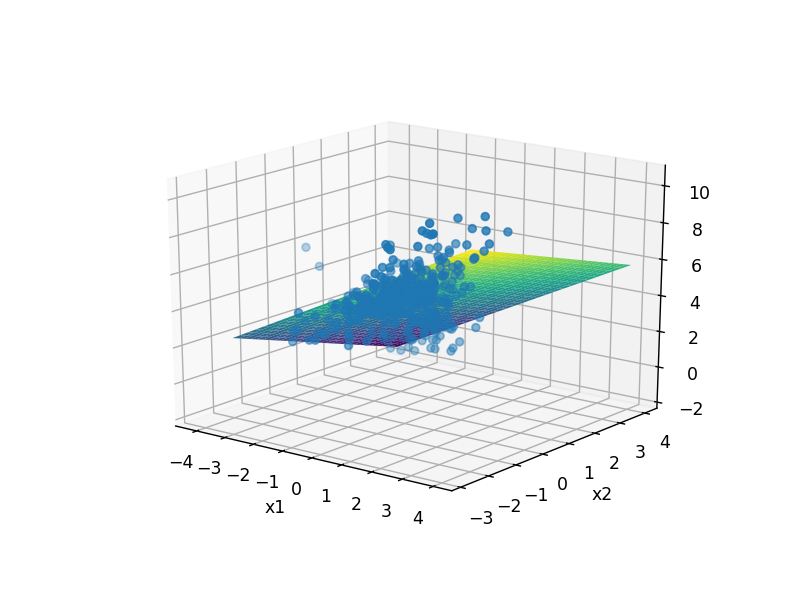

In [ ]:
X_norm, X_mean, X_stdev = reg.feature_scale(np.c_[X[:, 0], X[:, 2]])
X_aug = np.c_[np.ones((X.shape[0], 1)), X_norm]

m = 30
x_1 = np.linspace(-4,4,30)
y_1 = np.linspace(-2,4,30)

X_1,Y_1 = np.meshgrid(x_1,y_1)
Z= w_pred_mat_inv[3].mean()[1, 0]*X_1 + w_pred_mat_inv[3].mean()[2,0]*Y_1 + w_pred_mat_inv[3].mean()[0,0]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_norm[:, 0], X_norm[:, 1], y)
surf = ax.plot_surface(X_1, Y_1, Z, cmap='viridis')
# ax.plot_surface(X_norm[:, 0], X_norm[:, 1],  np.dot(X_aug, (w_pred_mat_inv[1].mean())), color='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
X.shape, y.shape

((487, 3), (487, 1))

In [ ]:
# 1 and 2 plane
# 2 and 3 parabola/plane
# 1 and 3 plane

In [ ]:

# run test
remainder[:test_size], test_slice = test_slice, remainder[:test_size].copy()
# run test
remainder[test_size:2*test_size], test_slice = test_slice, remainder[test_size:2*test_size].copy()


# etc.

In [ ]:
for i in range(5):
    print("--" + str(i) + "fold--\n\n")
    X[:]
    reg.